In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans 

In [2]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

# Titanic dataset analyse
In dit onderzoek analyseren we wie de grootste overlevingskans had op de Titanic. Dit doen wij aan de hand van de Titanic dataset. Wij zullen dit gaan onderzoeken door o.a. verschillen tussen passagiers te vergelijken en daaruit te analyseren wat de invloed is op de overlevingskans. Daarnaast zullen wij met machine learning proberen te voorspellen wat de overlevings kans zou zijn.

Als eerst laden wij de dataset in.

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
frames = [df_train, df_test]
df_total = pd.concat(frames)

## De dataset
Zoals hieron te zien is hebben wij de volgende gegevens: 
- PassengerId: Het nummer van de passagier
- Survived: 0 als de passagier het niet overleefd heeft en 1 als dit wel zo is
- Pclass: Welke ticket klasse had de passagier
- Name: De naam van de passagier
- Sex: Het geslacht van de passagier
- Age: De leeftijd van de passagier
- SibSp: Aantal broers/zussen aanwezig op de titanic
- Parch: Aantal ouders op het schip
- Ticket: Het ticket nummer
- Fare: Ticket kosten
- Cabin: Cabine nummer
- Embarked: Opstap haven

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Datatypes
Om de data goed te kunnen analyseren moeten we weten wat voor soort data we hebben. Dat is hieronder te zien

In [5]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Correlatie
Hieronder staat de correlatie tussen de verschillende datatypen. Echter is uit de tabel geen correlatie te halen. Geen van de waardes komt bij 1 in de buurt. De overlevingskans is daarom waarschijnlijk niet overal van afhankelijk

In [6]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Om de correlatie duidelijker weer te geven is hieronder een heatmap geplaatst. Hierbij is te zien dat er inderdaad weinig correlatie is.

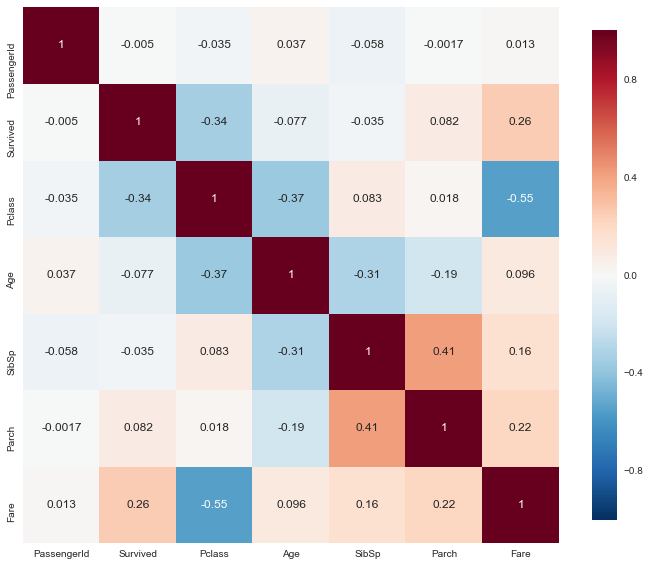

In [7]:
# plot_correlation_map(df_train)
corr = df_train.corr()
ax = plt.subplots( figsize =( 12 , 10 ) )
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
sns.heatmap(corr, square=True, cbar_kws={ 'shrink' : .9 }, annot = True, annot_kws = { 'fontsize' : 12 })

## Dataverdeling
Voordat je gaat analyseren is het handig om te weten wat de gemiddeldes, standaard deviatie, etc. van je data is. Dat toont de onderstaande tabel.

In [8]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Geslacht analyse
Een belangrijke verdeling bij de passagiers is het geslacht. Hieronder is het geslacht per klasse in een grafiek getoond. Op de y as staan de geslachten, op de x as hoeveel procent het overleefd heeft (0.8 = 80%). Elke kleur geeft een andere klasse aan. 

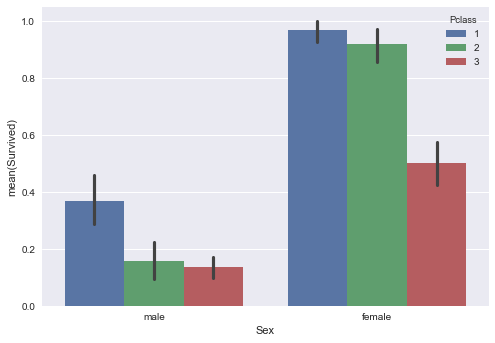

In [9]:
count_f = df_train[df_train["Sex"] == "female"].sum()
count_m = df_train[df_train["Sex"] == "male"].sum()

ax = sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df_train)

Uit dit diagram kunnen we opmaken dat de duurdere klassen een veel grotere overlevings kans hadden dan de goedkopere klassen. Ook is te zien dan mannen een veel kleinere overlevingskans hebben dan vrouwen. Dit komt waarschijnlijk omdat vrouwen en kinderen het eerst van boord mochten. Opmerkelijk is dat 2e en 3e klasse mannen bijna dezelfde kans hebben terwijl bij vrouwen het verschil heel groot is.

## Leeftijdsanalyse
Leeftijd is ook een interesante eigenschap om te onderzoeken. Hieronder is een grafiek geplot met het aantal overlevende per leeftijdscategorie. Hierbij staat op de y as het aantal overlevende en op de x as de verschillende leeftijdscategorieen. 

Er wordt gesplitst op verschillende leeftijdsgroepen, ook wordt er meteen gesorteerd op overlevende om de grafiek zometeen makkelijker te kunnen maken

In [10]:
df_young_survived = df_train[(df_train['Age'] < 20) & (df_train['Survived'] == 1)].count()
df_young_died = df_train[(df_train['Age'] < 20) & (df_train['Survived'] == 0)].count()

df_20p_survived = df_train[(df_train["Age"] <= 30) & (df_train["Age"] >= 20) & (df_train['Survived'] == 1)].count()
df_20p_died = df_train[(df_train["Age"] <= 30) & (df_train["Age"] >= 20) & (df_train['Survived'] == 0)].count()

df_30p_survived = df_train[(df_train["Age"] < 40) & (df_train["Age"] >= 30)& (df_train['Survived'] == 1)].count()
df_30p_died = df_train[(df_train["Age"] < 40) & (df_train["Age"] >= 30)& (df_train['Survived'] == 0)].count()

df_40p_survived = df_train[(df_train["Age"] <50 ) & (df_train["Age"] >= 40)& (df_train['Survived'] == 1)].count()
df_40p_died = df_train[(df_train["Age"] <50 ) & (df_train["Age"] >= 40)& (df_train['Survived'] == 0)].count()

df_O_survived = df_train[(df_train['Age'] > 50 ) & (df_train['Survived'] == 1)].count()
df_O_died = df_train[(df_train['Age'] > 50) & (df_train['Survived'] == 0)].count()

df_NaN_survived = df_train[(df_train.Age.isnull())  & (df_train['Survived'] == 1)].count()
df_NaN_died = df_train[(df_train.Age.isnull())  & (df_train['Survived'] == 0)].count()

Hieronder wordt  er eerst een ruw databestand aangemaakt en vervolgens omgezet naar een dataframe die gebruikt gaat worden binnen matplotlib

In [11]:
raw_data ={
    'ageclasses': ['young', '20-30', '30-40', '40-50', '50+','Age Not Available'],
    'survived': [df_young_survived.Survived , df_20p_survived.Survived , df_30p_survived.Survived , df_40p_survived.Survived , df_O_survived.Survived , df_NaN_survived.Survived],
    'died': [df_young_died.Survived , df_20p_died.Survived , df_30p_died.Survived , df_40p_died.Survived , df_O_died.Survived , df_NaN_died.Survived]
}

df_survivors = pd.DataFrame(raw_data, columns=['survived', 'died'])

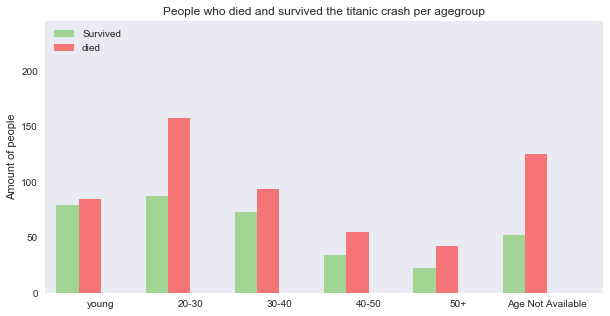

In [12]:
pos = list(range(len(df_survivors['died'])))
width = 0.25

fig, ax = plt.subplots(figsize=(10,5))

plt.bar(pos,
        df_survivors['survived'],
        width,
        alpha=0.5,
        color='#5BC236',
        label=raw_data['ageclasses'][0])
plt.bar([p + width for p in pos],
        df_survivors['died'],
        width,
        alpha=0.5,
        color='#FF0000',
        label=raw_data['ageclasses'][1])

# Set the y axis label
ax.set_ylabel('Amount of people')

# Set the chart's title
ax.set_title('People who died and survived the titanic crash per agegroup')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(raw_data['ageclasses'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df_survivors['survived'] + df_survivors['died'])] )

# Adding the legend and showing the plot
plt.legend(['Survived', 'died'], loc='upper left')
plt.grid()
plt.show()

In bovenstaand diagram is te zien dat de meeste bezoekers tussen de leeftijd 20-30 jaar ligt.  Ook is te zien dat het verschil tussen overlevende en doden bij mensen onder de 20 jaar het kleinst is.

## Opstap haven
Beschrijving:

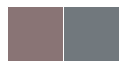

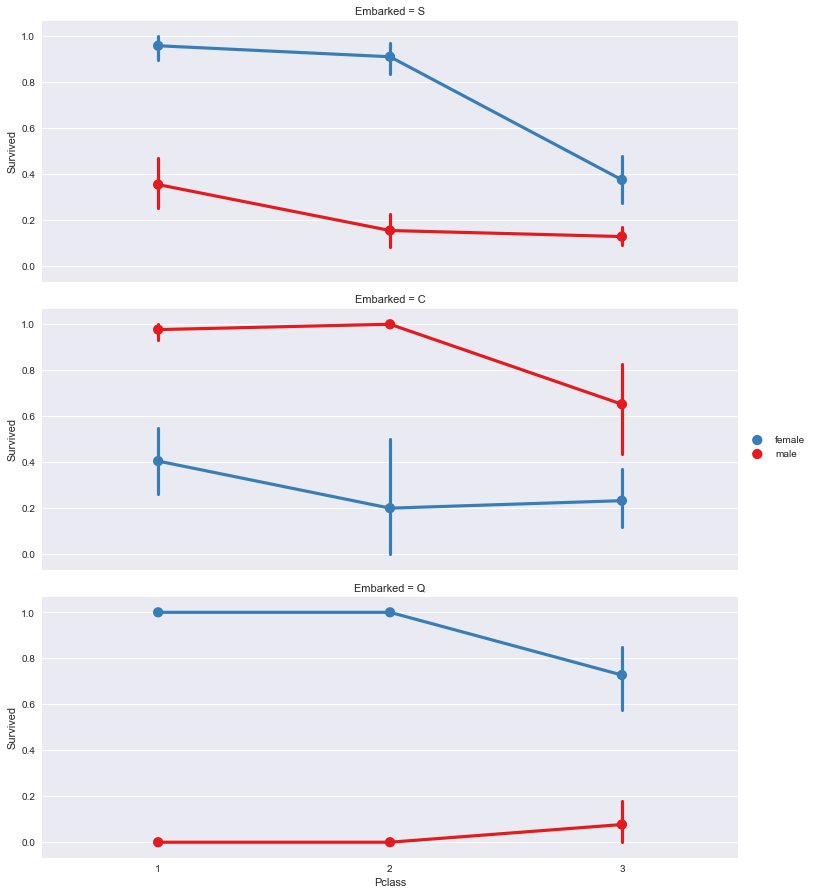

In [13]:
sns.palplot(sns.color_palette("Set1", n_colors=2, desat=.1))
grid = sns.FacetGrid(df_train, row='Embarked', size=4.2, aspect=2.5)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='Set1')
grid.add_legend()

## Familieleden analyse
Beschrijving


Beschrijving kelvin wat dit is:

In [14]:
df_train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Beschrijving kelvin wat dit is:

In [15]:
df_train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Beschrijving kelvin wat dit is:

In [16]:
combine = [df_train, df_test]
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


Beschrijving kelvin wat dit is:

In [17]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

df_train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


## Het voorspellen
Hieronder wordt met K-nearestNeighbors aan de hand van de testdata gekeken of we kunnen voorspellen wie het wel en niet overleven. Dit zal nooit 100% nauwkeurig zijn en niet alle data is meegenomen omdat K-nearestNeighbor alleen numerieke data accepteerd.

Om k-nearestNeighbor te gebruiken maak ik met sklearn een nieuwe data en test set aan. Vervolgens zetten we geslacht om naar een boolean zodat we deze mee kunnen nemen in de berekening. Vervolgens stellen we K-nearestNeighbor in met de train set en voorspellen we de uitkomst van de testset.

In [18]:
df_total = df_total.dropna(axis=0, how="any")

In [19]:
x_train, x_test, y_train, y_test = train_test_split(df_total[['Pclass', 'Age', 'Sex', 'SibSp']], df_total['Survived'])

In [20]:
d = {'female': 0, 'male': 1}
x_train['Sex'] = x_train['Sex'].map(d)
x_test['Sex'] = x_test['Sex'].map(d)

In [21]:
x_train = x_train.as_matrix()

In [22]:
neigh = KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train)

In [23]:
uitkomst = pd.DataFrame()
uitkomst["pred"] = neigh.predict(x_test)
# y_test = y_test.as_matrix()
uitkomst["uitk"] = y_test
print(uitkomst)

    pred  uitk
0    1.0   NaN
1    0.0   NaN
2    1.0   NaN
3    0.0   1.0
4    1.0   NaN
5    1.0   NaN
6    1.0   0.0
7    1.0   NaN
8    1.0   NaN
9    1.0   NaN
10   1.0   NaN
11   1.0   1.0
12   1.0   NaN
13   0.0   NaN
14   1.0   NaN
15   1.0   NaN
16   1.0   NaN
17   0.0   NaN
18   1.0   NaN
19   1.0   NaN
20   1.0   NaN
21   1.0   NaN
22   1.0   NaN
23   1.0   NaN
24   1.0   NaN
25   0.0   NaN
26   0.0   NaN
27   1.0   NaN
28   1.0   NaN
29   1.0   NaN
30   1.0   NaN
31   1.0   NaN
32   1.0   NaN
33   1.0   NaN
34   1.0   NaN
35   1.0   NaN
36   1.0   NaN
37   1.0   NaN
38   1.0   NaN
39   1.0   NaN
40   1.0   NaN
41   1.0   NaN
42   1.0   NaN
43   1.0   NaN
44   1.0   NaN
45   1.0   NaN


Uit de bovenstaande tabel is te zien dat de voorspelling redelijk accuraat is. In grote lijnen komt de testdata overheen met de voorspelling.